In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
airline=pd.read_excel("E:\\itsstudytym\\assignments\\Cluster\\EastWestAirlines C.xlsx",sheet_name='data')
airline.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [4]:
airline=airline.drop(['ID#','Days_since_enroll','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Flight_miles_12mo'],axis=1)
airline.head()

,Balance,Qual_miles,Bonus_trans,Flight_trans_12,Award?
0,28143,0,1,0,0
1,19244,0,2,0,0
2,41354,0,4,0,0
3,14776,0,1,0,0
4,97752,0,26,4,1


In [6]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [7]:
z=linkage(airline,method='complete',metric='euclidean')

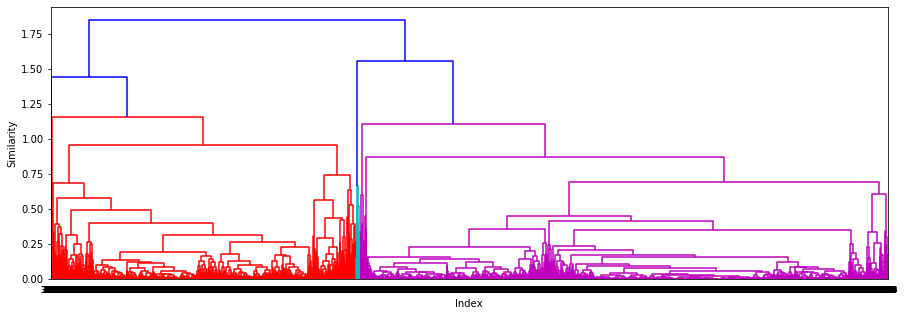

In [9]:
plt.figure(figsize=(15,5))
plt.xlabel('Index')
plt.ylabel('Similarity')
sch.dendrogram(z,leaf_rotation=0.,leaf_font_size=8)
plt.show()

In [10]:
h_clust=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean').fit(airline)
h_clust.labels_

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [11]:
airline.shape

(3999, 5)

In [17]:
clust_lab=pd.Series(h_clust.labels_)
airline['Cluster']=clust_lab
air=airline

In [18]:
air.head()

,Balance,Qual_miles,Bonus_trans,Flight_trans_12,Award?,Cluster
0,0.016508,0.0,0.011628,0.000000,0,1
1,0.011288,0.0,0.023256,0.000000,0,1
2,0.024257,0.0,0.046512,0.000000,0,1
3,0.008667,0.0,0.011628,0.000000,0,1
4,0.057338,0.0,0.302326,0.075472,1,0


In [19]:
airline=pd.read_excel("E:\\itsstudytym\\assignments\\Cluster\\EastWestAirlines C.xlsx",sheet_name='data')
airline=airline.drop(['ID#','Days_since_enroll','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Flight_miles_12mo'],axis=1)
airline.head()

,Balance,Qual_miles,Bonus_trans,Flight_trans_12,Award?
0,28143,0,1,0,0
1,19244,0,2,0,0
2,41354,0,4,0,0
3,14776,0,1,0,0
4,97752,0,26,4,1


In [5]:
scale.fit(airline.iloc[:,:-1])
airline.iloc[:,:-1]=scale.transform(airline.iloc[:,:-1])

In [44]:
airline.head()

,Balance,Qual_miles,Bonus_trans,Flight_trans_12,Award?
0,0.016508,0.0,0.011628,0.000000,0
1,0.011288,0.0,0.023256,0.000000,0
2,0.024257,0.0,0.046512,0.000000,0
3,0.008667,0.0,0.011628,0.000000,0
4,0.057338,0.0,0.302326,0.075472,1


In [45]:
sse=[]
k_rng=range(1,15)
for i in k_rng:
    km=KMeans(n_clusters=i)
    km.fit(airline.iloc[:,:-1])
    sse.append(km.inertia_)

sse

[103.56136620922061,
 70.87423193998525,
 53.89432176848966,
 41.082410131595864,
 34.04015331172488,
 29.35701697157259,
 26.44060176095398,
 23.996605424527505,
 21.776798341548506,
 19.9716437180914,
 18.52267834535499,
 17.30897072265084,
 16.226233794436304,
 15.414082637230447]

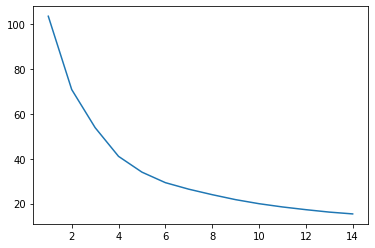

In [46]:
plt.plot(k_rng,sse)

In [47]:
km=KMeans(n_clusters=4)
y_pred=km.fit_predict(airline.iloc[:,:-1])

In [48]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [49]:
airline['Cluster']=y_pred

In [50]:
airline.head()

,Balance,Qual_miles,Bonus_trans,Flight_trans_12,Award?,Cluster
0,0.016508,0.0,0.011628,0.000000,0,1
1,0.011288,0.0,0.023256,0.000000,0,1
2,0.024257,0.0,0.046512,0.000000,0,1
3,0.008667,0.0,0.011628,0.000000,0,1
4,0.057338,0.0,0.302326,0.075472,1,0


In [51]:
air1=airline[airline.Cluster==0]
air2=airline[airline.Cluster==1]
air3=airline[airline.Cluster==2]
air4=airline[airline.Cluster==3]

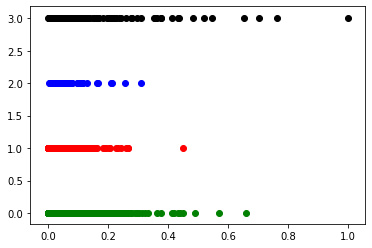

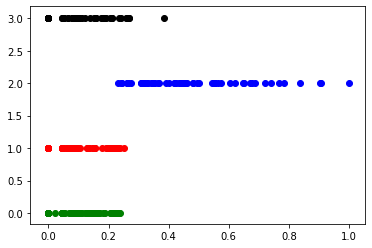

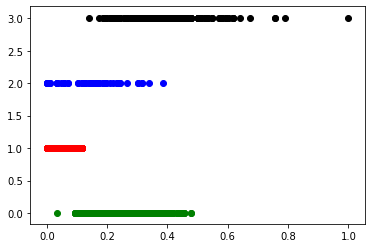

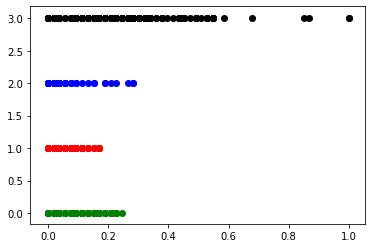

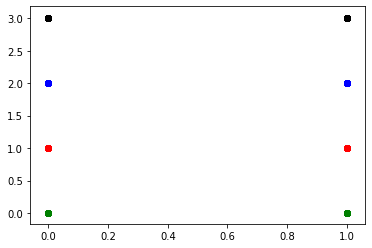

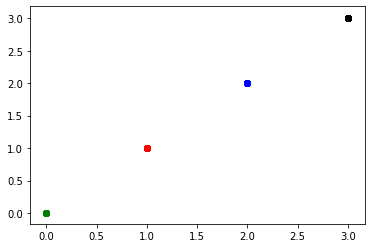

In [58]:
for feature in airline:
    plt.scatter(air1[feature],air1['Cluster'],color='green')
    plt.scatter(air2[feature],air2['Cluster'],color='red')
    plt.scatter(air3[feature],air3['Cluster'],color='blue')
    plt.scatter(air4[feature],air4['Cluster'],color='black')
    plt.show()


In [53]:
km.cluster_centers_

array([[0.05273786, 0.00453865, 0.19796035, 0.01677041],
       [0.02375223, 0.00414415, 0.03955686, 0.01111729],
       [0.06820587, 0.48070962, 0.14391918, 0.05598515],
       [0.12197777, 0.0323988 , 0.39105833, 0.25396025]])